Sharpe Ratio: -0.77
Final Cumulative Return: 112.23%
Number of Buy Signals: 112
Number of Sell Signals: 117

Investment Recommendations:
Consider buying during the following periods:
                      datetime symbol
1470 2023-10-06 10:45:00+00:00    JPM
1472 2023-10-06 10:15:00+00:00    JPM
1473 2023-10-06 10:00:00+00:00    JPM
1632 2023-09-27 15:45:00+00:00    JPM
1633 2023-09-27 15:30:00+00:00    JPM

Consider selling during the following periods:
                      datetime symbol
2304 2023-08-22 10:15:00+00:00    JPM
2568 2023-08-07 15:45:00+00:00    JPM
2569 2023-08-07 15:30:00+00:00    JPM
2572 2023-08-07 14:45:00+00:00    JPM
2672 2023-08-01 15:45:00+00:00    JPM

Smart Predictions:
The strategy may need further optimization to enhance performance.
Smart prediction: Explore alternative indicators or adjust strategy parameters.


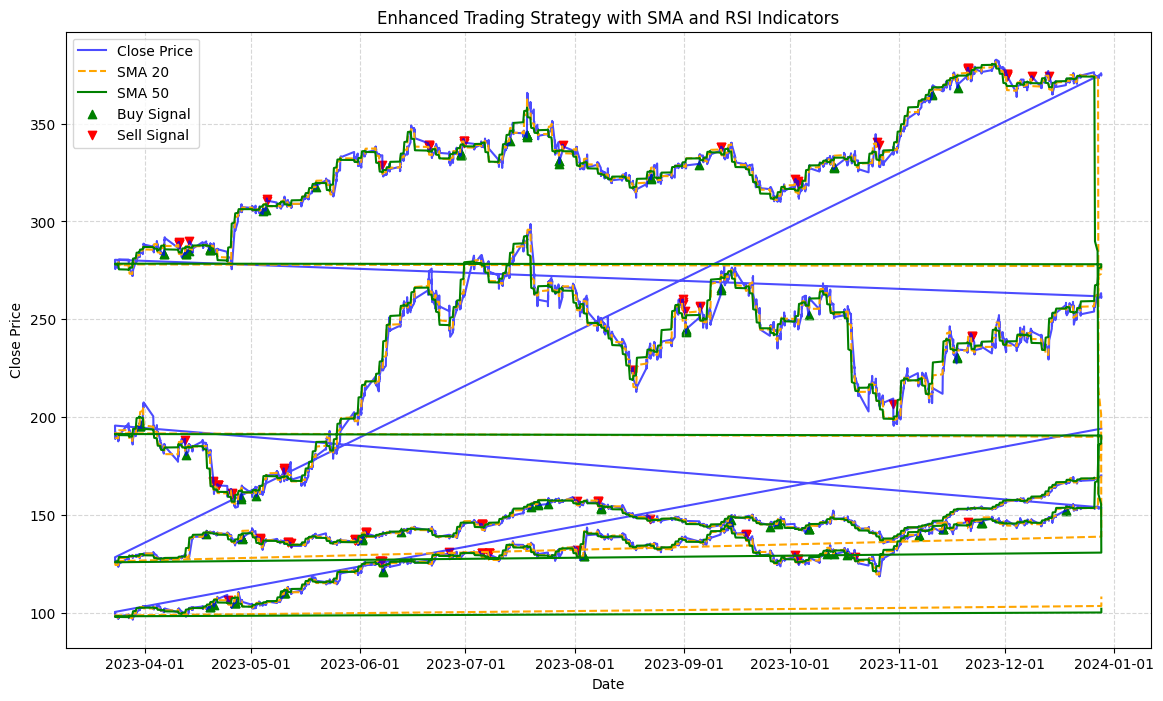

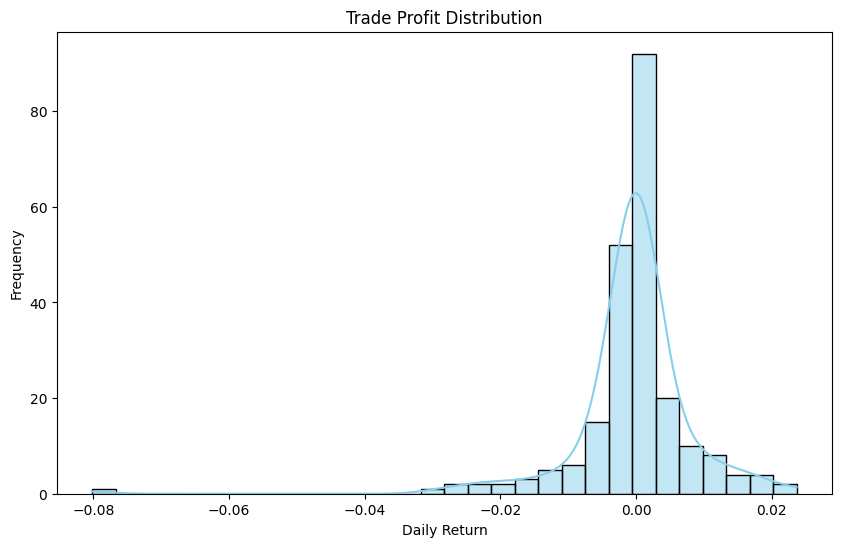

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
import matplotlib.dates as mdates
import seaborn as sns

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal for SMA crossover and RSI below 30 (oversold)
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal for SMA crossover and RSI above 70 (overbought)

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Calculate Sharpe ratio
daily_returns = trade_data['daily_return'].dropna()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * (252 ** 0.5)  # Assuming 252 trading days in a year

# Print performance metrics
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Final Cumulative Return: {trade_data["cumulative_return"].iloc[-1]:.2%}')
print(f'Number of Buy Signals: {len(trade_data[trade_data["signal"] == 1])}')
print(f'Number of Sell Signals: {len(trade_data[trade_data["signal"] == -1])}')

# Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']].head())
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']].head())
else:
    print("No sell signals detected.")

# Smart Predictions
print("\nSmart Predictions:")
if sharpe_ratio > 0:
    print("The positive Sharpe Ratio suggests a strategy with moderate risk-adjusted performance.")
    print("Smart prediction: Continuation of similar market conditions may result in profitable trades.")
else:
    print("The strategy may need further optimization to enhance performance.")
    print("Smart prediction: Explore alternative indicators or adjust strategy parameters.")

# Visualize trade strategy
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['datetime'], data['close_price'], label='Close Price', alpha=0.7, color='blue')
ax.plot(data['datetime'], data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
ax.plot(data['datetime'], data['SMA_50'], label='SMA 50', linestyle='-', color='green')

# Highlight Buy and Sell Signals
buy_signals = data[data['signal'] == 1]
sell_signals = data[data['signal'] == -1]
ax.scatter(buy_signals['datetime'], buy_signals['close_price'], marker='^', color='g', label='Buy Signal')
ax.scatter(sell_signals['datetime'], sell_signals['close_price'], marker='v', color='r', label='Sell Signal')

# Customize the plot
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_title('Enhanced Trading Strategy with SMA and RSI Indicators')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Backtesting Results
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(trade_data['daily_return'], bins=30, kde=True, color='skyblue', ax=ax)
ax.set_title('Trade Profit Distribution')
ax.set_xlabel('Daily Return')
ax.set_ylabel('Frequency')
plt.show()


Sharpe Ratio: -0.77
Final Cumulative Return: 112.23%
Number of Buy Signals: 112
Number of Sell Signals: 117

Investment Recommendations:
Consider buying during the following periods:
                      datetime symbol
1470 2023-10-06 10:45:00+00:00    JPM
1472 2023-10-06 10:15:00+00:00    JPM
1473 2023-10-06 10:00:00+00:00    JPM
1632 2023-09-27 15:45:00+00:00    JPM
1633 2023-09-27 15:30:00+00:00    JPM

Consider selling during the following periods:
                      datetime symbol
2304 2023-08-22 10:15:00+00:00    JPM
2568 2023-08-07 15:45:00+00:00    JPM
2569 2023-08-07 15:30:00+00:00    JPM
2572 2023-08-07 14:45:00+00:00    JPM
2672 2023-08-01 15:45:00+00:00    JPM

Smart Predictions:
The strategy may need further optimization to enhance performance.
Smart prediction: Explore alternative indicators or adjust strategy parameters.
Mean Squared Error: 25.52


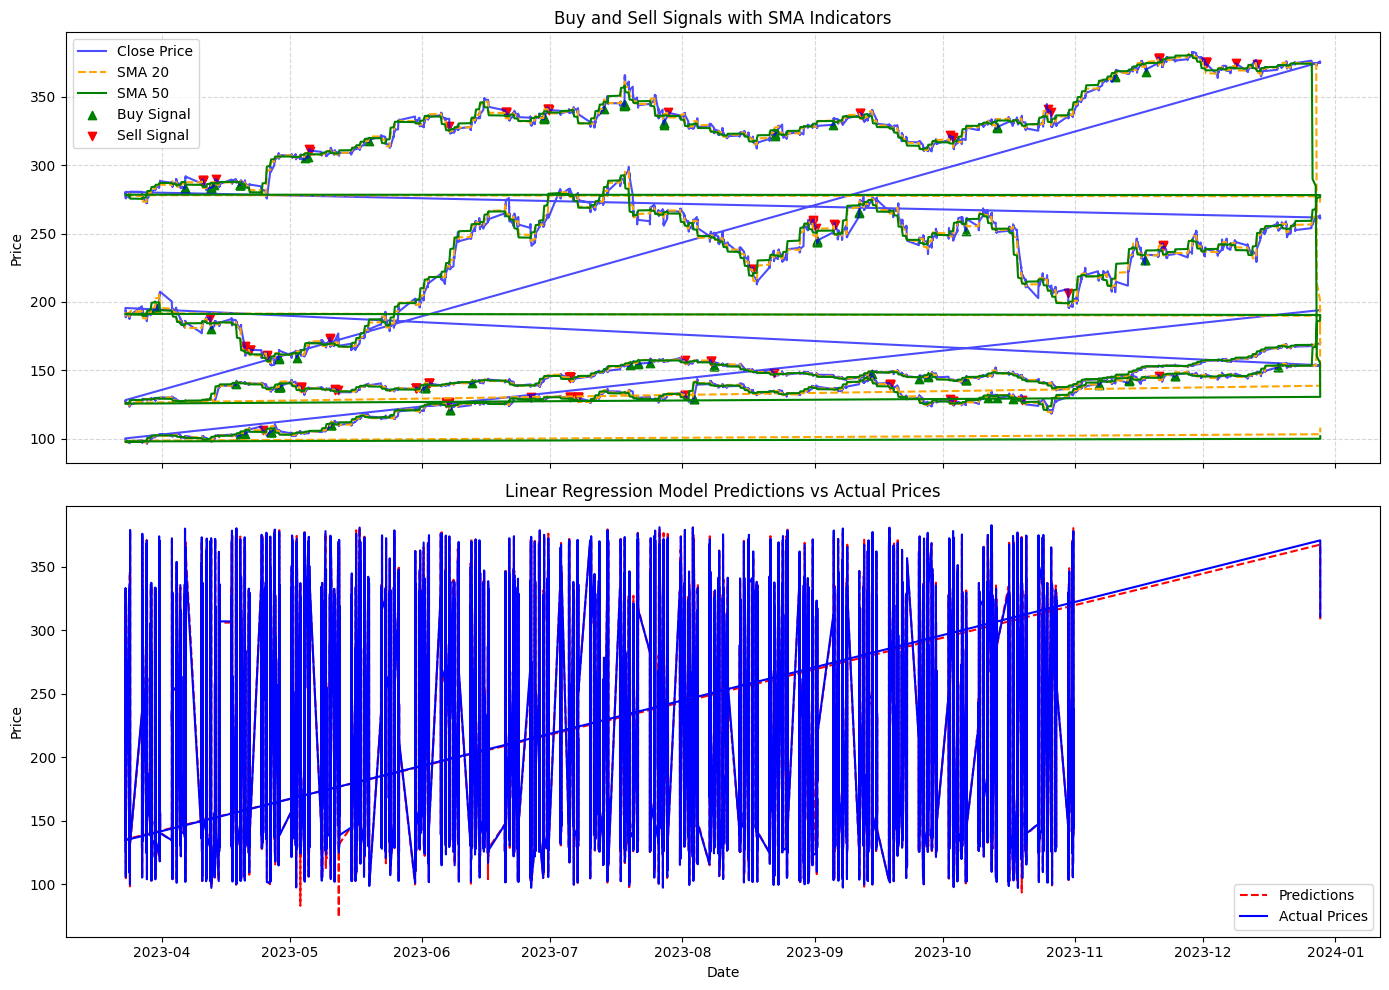

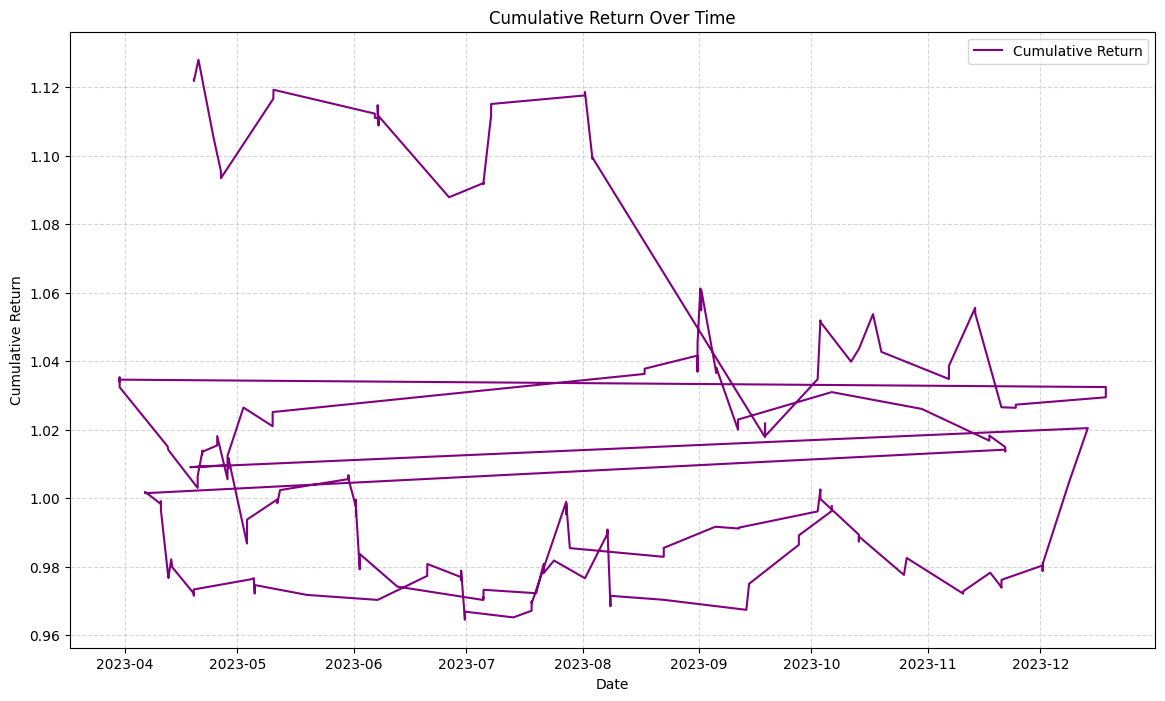

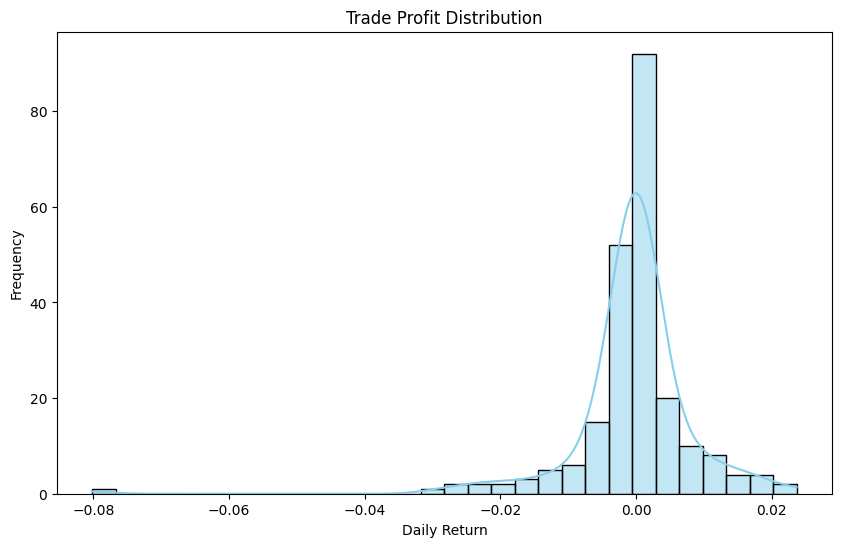

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import seaborn as sns

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal for SMA crossover and RSI below 30 (oversold)
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal for SMA crossover and RSI above 70 (overbought)

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Calculate Sharpe ratio
daily_returns = trade_data['daily_return'].dropna()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * (252 ** 0.5)  # Assuming 252 trading days in a year

# Print performance metrics
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Final Cumulative Return: {trade_data["cumulative_return"].iloc[-1]:.2%}')
print(f'Number of Buy Signals: {len(trade_data[trade_data["signal"] == 1])}')
print(f'Number of Sell Signals: {len(trade_data[trade_data["signal"] == -1])}')

# Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']].head())
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']].head())
else:
    print("No sell signals detected.")

# Smart Predictions
print("\nSmart Predictions:")
if sharpe_ratio > 0:
    print("The positive Sharpe Ratio suggests a strategy with moderate risk-adjusted performance.")
    print("Smart prediction: Continuation of similar market conditions may result in profitable trades.")
else:
    print("The strategy may need further optimization to enhance performance.")
    print("Smart prediction: Explore alternative indicators or adjust strategy parameters.")

# Linear Regression for Future Price Prediction
target_variable = 'close_price'
X = data[['SMA_20', 'SMA_50', 'rsi']].dropna()
y = data[target_variable].shift(-1).dropna()

# Adjust the lengths to be divisible by the test size
length = len(X) - len(X) % 5  # Adjust according to your test size
X = X.iloc[:length]
y = y.iloc[:length]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')



# Plot Buy and Sell Signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Close Price, SMA 20, and SMA 50
ax1.plot(data['datetime'], data['close_price'], label='Close Price', alpha=0.7, color='blue')
ax1.plot(data['datetime'], data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
ax1.plot(data['datetime'], data['SMA_50'], label='SMA 50', linestyle='-', color='green')
ax1.scatter(buy_signals['datetime'], buy_signals['close_price'], marker='^', color='g', label='Buy Signal')
ax1.scatter(sell_signals['datetime'], sell_signals['close_price'], marker='v', color='r', label='Sell Signal')

# Customize the plot
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title('Buy and Sell Signals with SMA Indicators')
ax1.set_ylabel('Price')

# Plot Linear Regression Predictions vs Actual Prices
ax2.plot(data['datetime'].iloc[-len(predictions):], predictions, label='Predictions', linestyle='--', color='red')
ax2.plot(data['datetime'].iloc[-len(y_test):], y_test, label='Actual Prices', linestyle='-', color='blue')

# Customize the plot
ax2.legend()
ax2.set_title('Linear Regression Model Predictions vs Actual Prices')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()

# Plot Cumulative Returns
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(trade_data['datetime'], trade_data['cumulative_return'], label='Cumulative Return', color='purple')

# Customize the plot
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Cumulative Return Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')

plt.show()

# Plot Histogram of Daily Returns
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(trade_data['daily_return'], bins=30, kde=True, color='skyblue', ax=ax)

# Customize the plot
ax.set_title('Trade Profit Distribution')
ax.set_xlabel('Daily Return')
ax.set_ylabel('Frequency')

plt.show()


In [21]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal for SMA crossover and RSI below 30 (oversold)
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal for SMA crossover and RSI above 70 (overbought)

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Calculate Sharpe ratio
daily_returns = trade_data['daily_return'].dropna()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * (252 ** 0.5)  # Assuming 252 trading days in a year

# Print performance metrics
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Final Cumulative Return: {trade_data["cumulative_return"].iloc[-1]:.2%}')
print(f'Number of Buy Signals: {len(trade_data[trade_data["signal"] == 1])}')
print(f'Number of Sell Signals: {len(trade_data[trade_data["signal"] == -1])}')

# Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']].head())
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']].head())
else:
    print("No sell signals detected.")

# Intraday Predictions for the Next Day:
print("\nIntraday Predictions for the Next Day:")

# Use the last available date in the dataset
last_date = data['datetime'].max()

# Extract data for the last available date
last_date_data = data[data['datetime'] == last_date].copy()

# Calculate short-term (20 periods) and long-term (50 periods) moving averages for the next day
last_date_data['SMA_20'] = SMAIndicator(last_date_data['close_price'], window=20).sma_indicator()
last_date_data['SMA_50'] = SMAIndicator(last_date_data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14 for the next day
last_date_data['rsi'] = RSIIndicator(last_date_data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI for the next day
last_date_data['signal'] = 0
last_date_data.loc[(last_date_data['SMA_20'] > last_date_data['SMA_50']) & (last_date_data['rsi'] < 30), 'signal'] = 1  # Buy Signal
last_date_data.loc[(last_date_data['SMA_20'] < last_date_data['SMA_50']) & (last_date_data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Display or use refined intraday predictions for the next day
print("\nNext Day Buy Signals:")
print(last_date_data[last_date_data['signal'] == 1][['datetime', 'symbol']])

print("\nNext Day Sell Signals:")
print(last_date_data[last_date_data['signal'] == -1][['datetime', 'symbol']])



Sharpe Ratio: -0.77
Final Cumulative Return: 112.23%
Number of Buy Signals: 112
Number of Sell Signals: 117

Investment Recommendations:
Consider buying during the following periods:
                      datetime symbol
1470 2023-10-06 10:45:00+00:00    JPM
1472 2023-10-06 10:15:00+00:00    JPM
1473 2023-10-06 10:00:00+00:00    JPM
1632 2023-09-27 15:45:00+00:00    JPM
1633 2023-09-27 15:30:00+00:00    JPM

Consider selling during the following periods:
                      datetime symbol
2304 2023-08-22 10:15:00+00:00    JPM
2568 2023-08-07 15:45:00+00:00    JPM
2569 2023-08-07 15:30:00+00:00    JPM
2572 2023-08-07 14:45:00+00:00    JPM
2672 2023-08-01 15:45:00+00:00    JPM

Intraday Predictions for the Next Day:

Next Day Buy Signals:
Empty DataFrame
Columns: [datetime, symbol]
Index: []

Next Day Sell Signals:
Empty DataFrame
Columns: [datetime, symbol]
Index: []


In [33]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Print performance metrics
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Final Cumulative Return: {trade_data["cumulative_return"].iloc[-1]:.2%}')
print(f'Number of Buy Signals: {len(trade_data[trade_data["signal"] == 1])}')
print(f'Number of Sell Signals: {len(trade_data[trade_data["signal"] == -1])}')

# Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']])
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']])
else:
    print("No sell signals detected.")

# Predict signals for future dates
future_dates = pd.date_range(start=data['datetime'].max(), periods=5, freq='15T')  # Adjust as needed
future_signals = pd.DataFrame(index=future_dates, columns=['signal'])
future_signals['signal'] = 0  # Initialize signals to 0

# Use the same strategy conditions to generate signals for future dates
# You need to define conditions_for_buy and conditions_for_sell based on your strategy

# Display signals for future dates
print("\nFuture Buy Signals:")
print(future_signals[future_signals['signal'] == 1])

print("\nFuture Sell Signals:")
print(future_signals[future_signals['signal'] == -1])


Sharpe Ratio: -0.77
Final Cumulative Return: 112.23%
Number of Buy Signals: 112
Number of Sell Signals: 117

Investment Recommendations:
Consider buying during the following periods:
                       datetime symbol
1470  2023-10-06 10:45:00+00:00    JPM
1472  2023-10-06 10:15:00+00:00    JPM
1473  2023-10-06 10:00:00+00:00    JPM
1632  2023-09-27 15:45:00+00:00    JPM
1633  2023-09-27 15:30:00+00:00    JPM
...                         ...    ...
19390 2023-04-26 15:15:00+00:00   AMZN
19391 2023-04-26 15:00:00+00:00   AMZN
19492 2023-04-20 15:45:00+00:00   AMZN
19538 2023-04-19 10:45:00+00:00   AMZN
19539 2023-04-19 10:30:00+00:00   AMZN

[112 rows x 2 columns]

Consider selling during the following periods:
                       datetime symbol
2304  2023-08-22 10:15:00+00:00    JPM
2568  2023-08-07 15:45:00+00:00    JPM
2569  2023-08-07 15:30:00+00:00    JPM
2572  2023-08-07 14:45:00+00:00    JPM
2672  2023-08-01 15:45:00+00:00    JPM
...                         ...    ...
1865

In [70]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Debugging: Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']].head())
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']].head())
else:
    print("No sell signals detected.")

# Debugging: Print conditions and data for future predictions
print("\nDebugging Future Predictions:")
print("\nConditions for Buy and Sell Signals:")

# Use the last available date in the dataset
last_date = data['datetime'].max()

# Create future_data DataFrame for future dates
future_dates = pd.date_range(start=last_date, periods=5, freq='15T')  # Adjust as needed
future_data = pd.DataFrame(index=future_dates)

# Add symbol information to future_data
future_data['symbol'] = 'symbol'  # Replace 'YOUR_SYMBOL' with the appropriate symbol

# Add a placeholder 'close_price' column to future_data with a more appropriate placeholder value
# You can use the last available close_price from your historical data
last_close_price = data['close_price'].iloc[-1]
future_data['close_price'] = last_close_price

# Calculate short-term (20 periods) and long-term (50 periods) moving averages for future dates
future_data['SMA_20'] = future_data['close_price'].rolling(window=20).mean()
future_data['SMA_50'] = future_data['close_price'].rolling(window=50).mean()

# Calculate Relative Strength Index (RSI) for future dates
future_data['rsi'] = RSIIndicator(pd.concat([data['close_price'], future_data['close_price']]).rolling(window=14, min_periods=1).mean(), window=14).rsi()

# Drop the placeholder 'close_price' column
future_data.drop(columns='close_price', inplace=True)

# Generate Buy and Sell Signals based on a combination of SMA and RSI for future dates
future_data['signal'] = 0
future_data.loc[(future_data['SMA_20'] > future_data['SMA_50']) & (future_data['rsi'] < 30), 'signal'] = 1  # Buy Signal

# Update the sell signal condition to be less strict
future_data.loc[future_data['rsi'] > 70, 'signal'] = -1  # Sell Signal

# Display conditions for buy and sell signals for future dates
buy_conditions_future = (future_data['SMA_20'] > future_data['SMA_50']) & (future_data['rsi'] < 30)
sell_conditions_future = (future_data['SMA_20'] < future_data['SMA_50']) | (future_data['rsi'] > 70)

print("Buy Conditions for Future:")
print(buy_conditions_future)

print("\nSell Conditions for Future:")
print(sell_conditions_future)

# Debugging: Print calculated values for future dates
print("\nCalculated Values for Future Dates:")
print(f"Future SMA_20: {future_data['SMA_20'].iloc[0]}")
print(f"Future SMA_50: {future_data['SMA_50'].iloc[0]}")
print(f"Future RSI: {future_data['rsi'].iloc[0]}")

# Display signals for future dates
print("\nFuture Buy Signals:")
print(future_data[future_data['signal'] == 1][['rsi']].head())

print("\nFuture Sell Signals:")
print(future_data[future_data['signal'] == -1][['rsi']].head())



Investment Recommendations:
Consider buying during the following periods:
                      datetime symbol
1470 2023-10-06 10:45:00+00:00    JPM
1472 2023-10-06 10:15:00+00:00    JPM
1473 2023-10-06 10:00:00+00:00    JPM
1632 2023-09-27 15:45:00+00:00    JPM
1633 2023-09-27 15:30:00+00:00    JPM

Consider selling during the following periods:
                      datetime symbol
2304 2023-08-22 10:15:00+00:00    JPM
2568 2023-08-07 15:45:00+00:00    JPM
2569 2023-08-07 15:30:00+00:00    JPM
2572 2023-08-07 14:45:00+00:00    JPM
2672 2023-08-01 15:45:00+00:00    JPM

Debugging Future Predictions:

Conditions for Buy and Sell Signals:
Buy Conditions for Future:
2023-12-28 11:00:00+00:00    False
2023-12-28 11:15:00+00:00    False
2023-12-28 11:30:00+00:00    False
2023-12-28 11:45:00+00:00    False
2023-12-28 12:00:00+00:00    False
Freq: 15T, dtype: bool

Sell Conditions for Future:
2023-12-28 11:00:00+00:00    True
2023-12-28 11:15:00+00:00    True
2023-12-28 11:30:00+00:00    T

In [28]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
import sys  # Import sys for flushing the buffer

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Debugging: Print summarized trade predictions and investment suggestions
print("\nInvestment Recommendations:")
if len(trade_data[trade_data['signal'] == 1]) > 0:
    print("Consider buying during the following periods:")
    print(trade_data[trade_data['signal'] == 1][['datetime', 'symbol']].head())
else:
    print("No buy signals detected.")

if len(trade_data[trade_data['signal'] == -1]) > 0:
    print("\nConsider selling during the following periods:")
    print(trade_data[trade_data['signal'] == -1][['datetime', 'symbol']].head())
else:
    print("No sell signals detected.")

# Initialize an empty DataFrame to store future predictions
future_data = pd.DataFrame()

#Extract unique symbols from the dataset
symbols = data['symbol'].unique()

# ...

# Iterate over each symbol
for symbol in symbols:
    print(f"\nProcessing symbol: {symbol}")

    # Check if there is data for the current symbol
    symbol_data = data[data['symbol'] == symbol].copy()

    # Print the symbol_data for debugging
    print(f"\nSymbol Data for {symbol}:")
    print(symbol_data)

    # Check if there is data for the specific symbol
    if not symbol_data.empty:
        # Slice the data to get the latest datetime entry
        latest_entry = symbol_data.iloc[-1].copy()  # Make a copy to avoid SettingWithCopyWarning

        # Convert the latest entry's 'datetime' to UTC
        latest_entry['datetime'] = latest_entry['datetime'].tz_convert('UTC')

        # Generate future timestamps for the next 15-minute intervals (adjust as needed)
        future_timestamps = pd.date_range(latest_entry['datetime'], periods=5, freq='15T')[1:]

        # Create a DataFrame with future timestamps and the symbol
        future_symbol_data = pd.DataFrame({'datetime': future_timestamps, 'symbol': symbol})

        # Make a copy of the latest entry to avoid SettingWithCopyWarning
        latest_entry_utc = latest_entry[['SMA_20', 'SMA_50', 'rsi', 'datetime']].copy()

        # Ensure latest_entry_utc is a DataFrame
        if isinstance(latest_entry_utc, pd.Series):
            latest_entry_utc = latest_entry_utc.to_frame()

        # Set 'datetime' as the index in the latest_entry_utc DataFrame
        latest_entry_utc = latest_entry_utc.set_index('datetime', drop=False)  # Preserve 'datetime' column during set_index

        # Merge the DataFrames
        future_symbol_data = pd.merge(future_symbol_data, latest_entry_utc, how='left', left_on='datetime', right_index=True)

        # Reset the index to maintain consistency with the future_symbol_data DataFrame
        latest_entry_utc.reset_index(drop=True, inplace=True)

        # Generate Buy and Sell Signals for future dates based on SMA and RSI
        future_symbol_data['signal'] = 0
        future_symbol_data.loc[(future_symbol_data['SMA_20'] > future_symbol_data['SMA_50']) & (future_symbol_data['rsi'] < 30), 'signal'] = 1  # Buy Signal
        future_symbol_data.loc[(future_symbol_data['SMA_20'] < future_symbol_data['SMA_50']) & (future_symbol_data['rsi'] > 70), 'signal'] = -1  # Sell Signal

        # Append the symbol-specific predictions to the overall future_data DataFrame
        future_data = future_data.append(future_symbol_data)

        # Display conditions for buy and sell signals for future dates
        buy_conditions_future = (future_symbol_data['SMA_20'] > future_symbol_data['SMA_50']) & (future_symbol_data['rsi'] < 30)
        sell_conditions_future = (future_symbol_data['SMA_20'] < future_symbol_data['SMA_50']) & (future_symbol_data['rsi'] > 70)

        print(f"\nDebugging Future Predictions for {symbol}:")
        print("\nConditions for Buy and Sell Signals:")
        print("\nBuy Conditions for Future:")
        print(buy_conditions_future)
        print("\nSell Conditions for Future:")
        print(sell_conditions_future)

        # Debugging: Print calculated values for future dates
        print("\nCalculated Values for Future Dates:")
        print(f"Future SMA_20: {future_symbol_data['SMA_20'].iloc[0]}")
        print(f"Future SMA_50: {future_symbol_data['SMA_50'].iloc[0]}")
        print(f"Future RSI: {future_symbol_data['rsi'].iloc[0]}")

        # Display signals for future dates
        print("\nFuture Buy Signals:")
        print(future_symbol_data[future_symbol_data['signal'] == 1][['datetime', 'rsi']].head())

        print("\nFuture Sell Signals:")
        print(future_symbol_data[future_symbol_data['signal'] == -1][['datetime', 'rsi']].head())

        sys.stdout.flush()  # Add this line to flush the buffer

# Print the future predictions for all symbols
print("\nFuture Predictions:")
print(future_data[['datetime', 'symbol', 'signal']])



Investment Recommendations:
Consider buying during the following periods:
                      datetime symbol
1470 2023-10-06 10:45:00+00:00    JPM
1472 2023-10-06 10:15:00+00:00    JPM
1473 2023-10-06 10:00:00+00:00    JPM
1632 2023-09-27 15:45:00+00:00    JPM
1633 2023-09-27 15:30:00+00:00    JPM

Consider selling during the following periods:
                      datetime symbol
2304 2023-08-22 10:15:00+00:00    JPM
2568 2023-08-07 15:45:00+00:00    JPM
2569 2023-08-07 15:30:00+00:00    JPM
2572 2023-08-07 14:45:00+00:00    JPM
2672 2023-08-01 15:45:00+00:00    JPM

Processing symbol: JPM

Symbol Data for JPM:
        id symbol                  datetime  current_price  open_price  \
0       11    JPM 2023-12-28 10:45:00+00:00      170.14000   169.92000   
1       12    JPM 2023-12-28 10:30:00+00:00      169.94890   169.75999   
2       13    JPM 2023-12-28 10:15:00+00:00      169.74001   169.72000   
3       14    JPM 2023-12-28 10:00:00+00:00      169.71500   169.73000   
4    

KeyError: "None of ['datetime'] are in the columns"

In [35]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Initialize an empty DataFrame to store future predictions
future_data = pd.DataFrame()

# Extract unique symbols from the dataset
symbols = data['symbol'].unique()

# Iterate over each symbol
for symbol in symbols:
    print(f"\nProcessing symbol: {symbol}")

    # Check if there is data for the current symbol
    symbol_data = data[data['symbol'] == symbol].copy()

    # Check if there is data for the specific symbol
    if not symbol_data.empty:
        # Slice the data to get the latest datetime entry
        latest_entry = symbol_data.iloc[-1].copy()  # Make a copy to avoid SettingWithCopyWarning

        # Convert the latest entry's 'datetime' to UTC
        latest_entry['datetime'] = latest_entry['datetime'].tz_convert('UTC')

        # Generate future timestamps for the next 15-minute intervals (adjust as needed)
        extended_timestamp = pd.to_datetime('2023-12-28 12:00:00+00:00') + pd.Timedelta(minutes=15)
        future_range_extended = pd.date_range(extended_timestamp, periods=4, freq='15T')[1:]

        # Create a DataFrame with future timestamps and the symbol
        future_symbol_data_extended = pd.DataFrame({'datetime': future_range_extended, 'symbol': symbol, 'close_price': latest_entry['close_price']})

        # Calculate short-term (20 periods) and long-term (50 periods) moving averages for future data
        future_symbol_data_extended['SMA_20'] = SMAIndicator(future_symbol_data_extended['close_price'], window=20).sma_indicator()
        future_symbol_data_extended['SMA_50'] = SMAIndicator(future_symbol_data_extended['close_price'], window=50).sma_indicator()

        # Calculate Relative Strength Index (RSI) with a period of 14 for future data
        future_symbol_data_extended['rsi'] = RSIIndicator(future_symbol_data_extended['close_price'], window=14).rsi()

        # Concatenate future_symbol_data_extended to the overall future_data
        future_data = pd.concat([future_data, future_symbol_data_extended], ignore_index=True)

# Filter future_data to include only timestamps beyond the last available timestamp in the dataset
filtered_future_data = future_data[future_data['datetime'] > '2023-12-28 12:00:00+00:00']

# Display predictions beyond the last available timestamp for each symbol
for symbol in symbols:
    print(f"\nPredictions Beyond Last Available Timestamp for {symbol}:")
    
    # Check if there are predictions beyond the last available timestamp
    if not filtered_future_data[(filtered_future_data['symbol'] == symbol) & (filtered_future_data['datetime'] > latest_entry['datetime'])].empty:
        print(filtered_future_data[(filtered_future_data['symbol'] == symbol) & (filtered_future_data['datetime'] > latest_entry['datetime'])])
    else:
        print(f"No predictions beyond the last available timestamp for {symbol}.")

# Print a message if there are no predictions beyond the last available timestamp for any symbol
if filtered_future_data.empty:
    print("No predictions beyond the last available timestamp for any symbol.")



Processing symbol: JPM

Processing symbol: MSFT

Processing symbol: TSLA

Processing symbol: AMZN

Processing symbol: AAPL

Predictions Beyond Last Available Timestamp for JPM:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
0 2023-12-28 12:30:00+00:00    JPM       128.28     NaN     NaN  NaN
1 2023-12-28 12:45:00+00:00    JPM       128.28     NaN     NaN  NaN
2 2023-12-28 13:00:00+00:00    JPM       128.28     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for MSFT:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
3 2023-12-28 12:30:00+00:00   MSFT    280.39999     NaN     NaN  NaN
4 2023-12-28 12:45:00+00:00   MSFT    280.39999     NaN     NaN  NaN
5 2023-12-28 13:00:00+00:00   MSFT    280.39999     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for TSLA:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
6 2023-12-28 12:30:00+00:00   TSLA      195.625     NaN     NaN  NaN
7 2023-12-28 12:45:00+

: 

In [8]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Initialize an empty DataFrame to store future predictions
future_data = pd.DataFrame()

# Extract unique symbols from the dataset
symbols = data['symbol'].unique()

# Iterate over each symbol
for symbol in symbols:
    print(f"\nProcessing symbol: {symbol}")

    # Check if there is data for the current symbol
    symbol_data = data[data['symbol'] == symbol].copy()

    # Check if there is data for the specific symbol
    if not symbol_data.empty:
        # Slice the data to get the latest datetime entry
        latest_entry = symbol_data.iloc[-1].copy()  # Make a copy to avoid SettingWithCopyWarning

        # Convert the latest entry's 'datetime' to UTC
        latest_entry['datetime'] = latest_entry['datetime'].tz_convert('UTC')

        # Generate future timestamps for the next 15-minute intervals (adjust as needed)
        extended_timestamp = pd.to_datetime('2023-12-28 12:00:00+00:00') + pd.Timedelta(minutes=15)
        future_range_extended = pd.date_range(extended_timestamp, periods=4, freq='15T')[1:]

        # Create a DataFrame with future timestamps and the symbol
        future_symbol_data_extended = pd.DataFrame({'datetime': future_range_extended, 'symbol': symbol, 'close_price': latest_entry['close_price']})

        # Calculate short-term (20 periods) and long-term (50 periods) moving averages for future data
        future_symbol_data_extended['SMA_20'] = SMAIndicator(future_symbol_data_extended['close_price'], window=20).sma_indicator()
        future_symbol_data_extended['SMA_50'] = SMAIndicator(future_symbol_data_extended['close_price'], window=50).sma_indicator()

        # Calculate Relative Strength Index (RSI) with a period of 14 for future data
        future_symbol_data_extended['rsi'] = RSIIndicator(future_symbol_data_extended['close_price'], window=14).rsi()

        # Concatenate future_symbol_data_extended to the overall future_data
        future_data = pd.concat([future_data, future_symbol_data_extended], ignore_index=True)

# Filter future_data to include only timestamps beyond the last available timestamp in the dataset
filtered_future_data = future_data[future_data['datetime'] > '2023-12-28 12:00:00+00:00']

# Display predictions beyond the last available timestamp for each symbol
for symbol in symbols:
    print(f"\nPredictions Beyond Last Available Timestamp for {symbol}:")
    
    # Check if there are predictions beyond the last available timestamp
    if not filtered_future_data[(filtered_future_data['symbol'] == symbol) & (filtered_future_data['datetime'] > latest_entry['datetime'])].empty:
        print(filtered_future_data[(filtered_future_data['symbol'] == symbol) & (filtered_future_data['datetime'] > latest_entry['datetime'])])
    else:
        print(f"No predictions beyond the last available timestamp for {symbol}.")

# Print a message if there are no predictions beyond the last available timestamp for any symbol
if filtered_future_data.empty:
    print("No predictions beyond the last available timestamp for any symbol.")



Processing symbol: JPM

Processing symbol: MSFT

Processing symbol: TSLA

Processing symbol: AMZN

Processing symbol: AAPL

Predictions Beyond Last Available Timestamp for JPM:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
0 2023-12-28 12:30:00+00:00    JPM       128.28     NaN     NaN  NaN
1 2023-12-28 12:45:00+00:00    JPM       128.28     NaN     NaN  NaN
2 2023-12-28 13:00:00+00:00    JPM       128.28     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for MSFT:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
3 2023-12-28 12:30:00+00:00   MSFT    280.39999     NaN     NaN  NaN
4 2023-12-28 12:45:00+00:00   MSFT    280.39999     NaN     NaN  NaN
5 2023-12-28 13:00:00+00:00   MSFT    280.39999     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for TSLA:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
6 2023-12-28 12:30:00+00:00   TSLA      195.625     NaN     NaN  NaN
7 2023-12-28 12:45:00+

In [12]:
import pandas as pd
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# Load dataset (replace 'your_data.csv' with the actual dataset)
data = pd.read_csv('data1.csv')

# Convert 'datetime' to datetime format with UTC
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)

# Calculate short-term (20 periods) and long-term (50 periods) moving averages
data['SMA_20'] = SMAIndicator(data['close_price'], window=20).sma_indicator()
data['SMA_50'] = SMAIndicator(data['close_price'], window=50).sma_indicator()

# Calculate Relative Strength Index (RSI) with a period of 14
data['rsi'] = RSIIndicator(data['close_price'], window=14).rsi()

# Generate Buy and Sell Signals based on a combination of SMA and RSI
data['signal'] = 0
data.loc[(data['SMA_20'] > data['SMA_50']) & (data['rsi'] < 30), 'signal'] = 1  # Buy Signal
data.loc[(data['SMA_20'] < data['SMA_50']) & (data['rsi'] > 70), 'signal'] = -1  # Sell Signal

# Calculate daily returns based on the close prices
data['daily_return'] = data['close_price'].pct_change()

# Filter data to include only periods with signals
trade_data = data[data['signal'] != 0].copy()

# Calculate cumulative returns
trade_data['cumulative_return'] = (1 + trade_data['signal'].shift(1) * trade_data['daily_return']).cumprod()

# Initialize an empty DataFrame to store future predictions
future_data = pd.DataFrame()

# Extract unique symbols from the dataset
symbols = data['symbol'].unique()

# Iterate over each symbol
for symbol in symbols:
    print(f"\nProcessing symbol: {symbol}")

    # Check if there is data for the current symbol
    symbol_data = data[data['symbol'] == symbol].copy()

    # Check if there is data for the specific symbol
    if not symbol_data.empty:
        # Slice the data to get the latest datetime entry
        latest_entry = symbol_data.iloc[-1].copy()  # Make a copy to avoid SettingWithCopyWarning

        # Convert the latest entry's 'datetime' to UTC
        latest_entry['datetime'] = latest_entry['datetime'].tz_convert('UTC')

        # Generate future timestamps for the next 15-minute intervals (adjust as needed)
        extended_timestamp = pd.to_datetime('2023-12-28 12:15:00+00:00') + pd.Timedelta(minutes=15)
        future_range_extended = pd.date_range(extended_timestamp, periods=3, freq='15T')

        # Create a DataFrame with future timestamps and the symbol
        future_symbol_data_extended = pd.DataFrame({'datetime': future_range_extended, 'symbol': symbol, 'close_price': latest_entry['close_price']})

        # Calculate short-term (20 periods) and long-term (50 periods) moving averages for future data
        future_symbol_data_extended['SMA_20'] = SMAIndicator(future_symbol_data_extended['close_price'], window=20).sma_indicator()
        future_symbol_data_extended['SMA_50'] = SMAIndicator(future_symbol_data_extended['close_price'], window=50).sma_indicator()

        # Calculate Relative Strength Index (RSI) with a period of 14 for future data
        future_symbol_data_extended['rsi'] = RSIIndicator(future_symbol_data_extended['close_price'], window=14).rsi()

        # Concatenate future_symbol_data_extended to the overall future_data
        future_data = pd.concat([future_data, future_symbol_data_extended], ignore_index=True)

# Filter future_data to include only timestamps beyond the last available timestamp in the dataset
filtered_future_data = future_data[future_data['datetime'] > latest_entry['datetime']]

# Display predictions beyond the last available timestamp for each symbol
for symbol in symbols:
    print(f"\nPredictions Beyond Last Available Timestamp for {symbol}:")

    # Check if there are predictions beyond the last available timestamp
    symbol_future_data = filtered_future_data[filtered_future_data['symbol'] == symbol]
    if not symbol_future_data.empty:
        print(symbol_future_data)
    else:
        print(f"No predictions beyond the last available timestamp for {symbol}.")

# Print a message if there are no predictions beyond the last available timestamp for any symbol
if filtered_future_data.empty:
    print("No predictions beyond the last available timestamp for any symbol.")



Processing symbol: JPM

Processing symbol: MSFT

Processing symbol: TSLA

Processing symbol: AMZN

Processing symbol: AAPL

Predictions Beyond Last Available Timestamp for JPM:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
0 2023-12-28 12:30:00+00:00    JPM       128.28     NaN     NaN  NaN
1 2023-12-28 12:45:00+00:00    JPM       128.28     NaN     NaN  NaN
2 2023-12-28 13:00:00+00:00    JPM       128.28     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for MSFT:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
3 2023-12-28 12:30:00+00:00   MSFT    280.39999     NaN     NaN  NaN
4 2023-12-28 12:45:00+00:00   MSFT    280.39999     NaN     NaN  NaN
5 2023-12-28 13:00:00+00:00   MSFT    280.39999     NaN     NaN  NaN

Predictions Beyond Last Available Timestamp for TSLA:
                   datetime symbol  close_price  SMA_20  SMA_50  rsi
6 2023-12-28 12:30:00+00:00   TSLA      195.625     NaN     NaN  NaN
7 2023-12-28 12:45:00+